In [2]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
import datetime as dt
import re
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [3]:
df = pd.read_csv("data_wordcloud.csv")

In [7]:
df= df.drop(columns="processed_review")

In [20]:
df.columns

Index(['review_id', 'review_title', 'review_date', 'review_rating',
       'review_content', 'review_location', 'month_year', 'month_year_str',
       'positive_words', 'negative_words'],
      dtype='object')

In [21]:
df.head()

,review_id,review_title,review_date,review_rating,review_content,review_location,month_year,month_year_str,positive_words,negative_words
0,65b356989fc6ec42f5d5e5ae,The order has arrived as promised,2024-01-25,4,The order has arrived as promised. All was gre...,BG,2024-01,2024-01,"[promised, great, surprised, bulgarian, local,...",[]
1,65aed6b600af4883acaf8caf,"TIG (WIG) welder, model S-WIGMA 200PDC",2024-01-22,5,"I ordered a TIG (WIG) / MMA welder, model S-WI...",AT,2024-01,2024-01,"[tig, quick, devicefirst, fine, current, curre...",[]
2,65b21547adf5d0f2623c41c0,I would buy an electronic scale…I have no one ...,2024-01-18,1,I would buy an electronic scale (Counting scal...,RO,2024-01,2024-01,[],"[electronic, scale, worse, use, stupid, concre..."
3,65a3c4680208eaa47b381c4d,The product arrived on time all the…,2024-01-12,5,The product arrived on time all the assembly d...,IE,2024-01,2024-01,"[handy, clear, great]",[]
4,65a68b82126d92f1f9a4d330,Awesome experience,2024-01-15,5,Awesome experience. We had to use their custom...,BG,2024-01,2024-01,"[awesome, outstanding]",[]


In [22]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

# Assuming you have already loaded your DataFrame with a column 'review_content'
# df = pd.read_csv('your_data.csv')

# You might need to download NLTK resources for stopwords and punkt
# nltk.download('stopwords')
# nltk.download('punkt')

# Function to get positive and negative words
def get_sentiment_words(text):
    sia = SentimentIntensityAnalyzer()
    tokens = word_tokenize(text)
    positive_words = [word.lower() for word in tokens if sia.polarity_scores(word)['compound'] > 0]
    negative_words = [word.lower() for word in tokens if sia.polarity_scores(word)['compound'] < 0]
    return positive_words, negative_words

In [24]:
# Apply the function to your DataFrame
df['positive_words'], df['negative_words'] = zip(*df['review_content'].astype(str).apply(get_sentiment_words))

In [25]:
# Join all positive and negative words into two strings
all_positive_words = ' '.join(df['positive_words'].sum())
all_negative_words = ' '.join(df['negative_words'].sum())

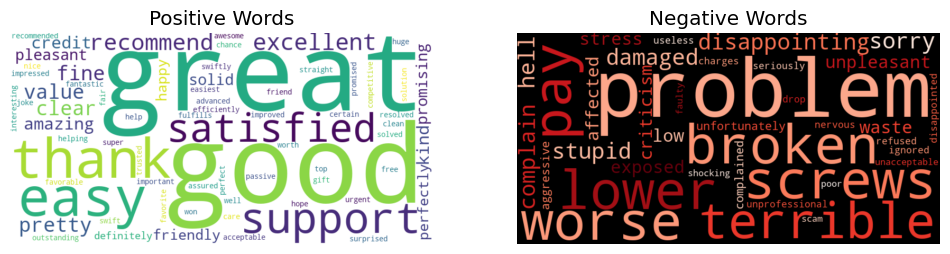

In [31]:
# Create word clouds for positive and negative words
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_positive_words)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(all_negative_words)

# Plot the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Words')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Words')
plt.axis('off')

plt.show()

In [32]:
df.head()

,review_id,review_title,review_date,review_rating,review_content,review_location,month_year,month_year_str,positive_words,negative_words
0,65b356989fc6ec42f5d5e5ae,The order has arrived as promised,2024-01-25,4,The order has arrived as promised. All was gre...,BG,2024-01,2024-01,"[promised, great, surprised, kind, gift, friend]",[disappointing]
1,65aed6b600af4883acaf8caf,"TIG (WIG) welder, model S-WIGMA 200PDC",2024-01-22,5,"I ordered a TIG (WIG) / MMA welder, model S-WI...",AT,2024-01,2024-01,"[fine, like, pretty, good, nice, advanced, like]","[lower, lower]"
2,65b21547adf5d0f2623c41c0,I would buy an electronic scale…I have no one ...,2024-01-18,1,I would buy an electronic scale (Counting scal...,RO,2024-01,2024-01,[helping],"[worse, no, stupid]"
3,65a3c4680208eaa47b381c4d,The product arrived on time all the…,2024-01-12,5,The product arrived on time all the assembly d...,IE,2024-01,2024-01,"[perfect, clear, great, well]",[]
4,65a68b82126d92f1f9a4d330,Awesome experience,2024-01-15,5,Awesome experience. We had to use their custom...,BG,2024-01,2024-01,"[awesome, support, outstanding, support]",[]


In [33]:
df2 = df.copy()

In [34]:
from nltk.corpus import stopwords

# Assuming you have already loaded your DataFrame with a column 'review_content'
# df = pd.read_csv('your_data.csv')

# Download NLTK stopwords if not already downloaded
# nltk.download('stopwords')

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Function to get positive and negative words, removing stopwords
def get_sentiment_words(text):
    sia = SentimentIntensityAnalyzer()
    tokens = word_tokenize(text)
    positive_words = [word.lower() for word in tokens if sia.polarity_scores(word)['compound'] > 0 and word.lower() not in stop_words]
    negative_words = [word.lower() for word in tokens if sia.polarity_scores(word)['compound'] < 0 and word.lower() not in stop_words]
    return positive_words, negative_words



In [35]:
# Apply the function to your DataFrame
df2['positive_words'], df2['negative_words'] = zip(*df2['review_content'].astype(str).apply(get_sentiment_words))



In [37]:
# Join all positive and negative words into two strings
all_positive_words2 = ' '.join(df2['positive_words'].sum())
all_negative_words2 = ' '.join(df2['negative_words'].sum())



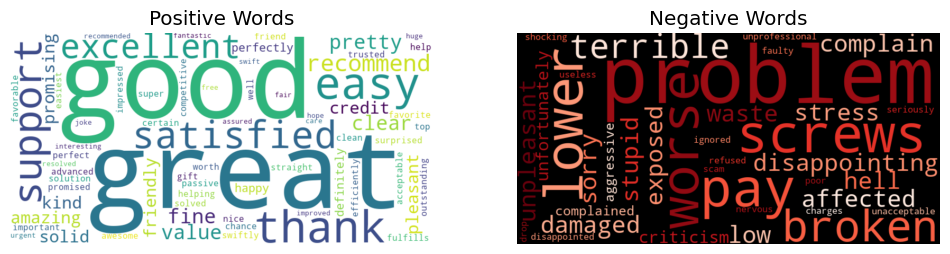

In [38]:
# Create word clouds for positive and negative words
positive_wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate(all_positive_words2)
negative_wordcloud2 = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(all_negative_words2)

# Plot the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud2, interpolation='bilinear')
plt.title('Positive Words')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud2, interpolation='bilinear')
plt.title('Negative Words')
plt.axis('off')

plt.show()


In [39]:
df3 = pd.read_csv("data_wordcloud2.csv")

In [41]:
df3.head()

,review_id,review_title,review_date,review_rating,review_content,review_location,month_year,month_year_str,processed_review
0,"65b356989fc6ec42f5d5e5ae,The order has arrived...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"65aed6b600af4883acaf8caf,""TIG (WIG) welder, mo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"65b21547adf5d0f2623c41c0,I would buy an electr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"65a3c4680208eaa47b381c4d,The product arrived o...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"65a68b82126d92f1f9a4d330,Awesome experience,20...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
def get_sentiment_words(row):
    sia = SentimentIntensityAnalyzer()

    # Check if the 'sentiment' column exists and is not empty
    if 'sentiment' in row and pd.notnull(row['sentiment']):
        sentiment = row['sentiment']
        if sentiment == 'positive':
            return [word.lower() for word in word_tokenize(row['review_content'])], []
        elif sentiment == 'negative':
            return [], [word.lower() for word in word_tokenize(row['review_content']).astyp]
        else:
            return [], []

    # If 'sentiment' column is empty or doesn't exist, use polarity scores
    tokens = word_tokenize(row['review_content'])
    positive_words = [word.lower() for word in tokens if sia.polarity_scores(word)['compound'] > 0]
    negative_words = [word.lower() for word in tokens if sia.polarity_scores(word)['compound'] < 0]
    return positive_words, negative_words




In [ ]:
df3['positive_words'], df3['negative_words'] = zip(*df.apply(get_sentiment_words, axis=1))

In [ ]:
# Join all positive and negative words into two strings
all_positive_words = ' '.join(df['positive_words'].sum())
all_negative_words = ' '.join(df['negative_words'].sum())

In [ ]:
# Create word clouds for positive and negative words
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_positive_words)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(all_negative_words)

# Plot the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Words')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Words')
plt.axis('off')

plt.show()